## Analysis of Crime and Census Data

The following code performs an analysis of crime data and its relationships with various demographic features. The analysis begins by importing the necessary libraries and reading in two datasets: the UCR dataset and the census dataset. These two datasets are then merged on the "Group" column.

The code then defines a function called `plot_crime_counts` that takes in various demographic features, such as age, sex, race, and ethnicity, and plots the count of crimes based on these features. This function groups the data by the specified demographic feature and counts the number of values in the crime column. It then creates a bar plot using seaborn, with the x-axis labeled with the specified demographic feature, the y-axis labeled with the crime count, and the title set to the specified title. The plot is saved with a specified filename and returned as an object.

Using the `plot_crime_counts` function, the code plots crime counts by age, sex, race, and ethnicity. It then uses a subset of the data with only the necessary columns to calculate the crime rate for each city. After grouping the data by city, the code calculates the mean crime rate for each city and prints it out.

The code then converts the `Incident_Date` column to a datetime format and groups the data by year and offense type. It then calculates the count of incidents and prints the results.

Lastly, the code defines two functions: `plot_corr_heatmap` and `plot_regression_scatter`. The `plot_corr_heatmap` function creates a correlation matrix heatmap using seaborn. The `plot_regression_scatter` function creates a scatter plot of the relationship between two variables using seaborn.

Using these two functions, the code selects the relevant columns for correlation analysis, creates a correlation matrix heatmap, and creates four linear regression scatter plots to explore the relationships between demographic variables and crime rate. The plots include population vs. crime rate, median age vs. crime rate, household income vs. crime rate, and per capita income vs. crime rate.

In [1]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import folium

In [2]:
# Read the UCR dataset
ucr_data = pd.read_csv("FBI's UCR - SLC.csv")

# Read the census dataset
census_data = pd.read_csv('census_data.csv')

# Merge the two datasets on the "Group" column
merged_data = pd.merge(ucr_data, census_data, on='Group')

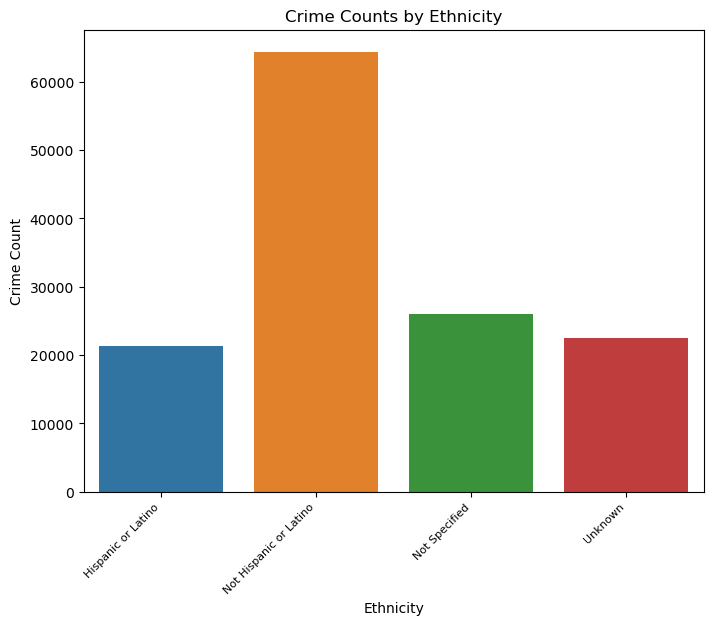

In [3]:
def plot_crime_counts(data, x_col, y_col, x_label, y_label, title, file_name, fig_size=(8, 6), x_label_fontsize=8):
    crime_counts = data.groupby([x_col])[y_col].count().reset_index(name='count')
    fig = sns.barplot(x=x_col, y='count', data=crime_counts)
    fig.set(xlabel=x_label, ylabel=y_label)
    fig.set(title=title)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha='right', fontsize=x_label_fontsize)
    fig.figure.set_size_inches(fig_size[0], fig_size[1])
    fig.figure.savefig(file_name, bbox_inches='tight')
    return fig

# Subset the data to include only the variables of interest
crime_data = merged_data[['Group', 'Incident_ID', 'Arrestee_Age', 'Arrestee_Sex', 'Arrestee_Race', 'Arrestee_Ethnicity']]

# Plot crime counts by age
fig1 = plot_crime_counts(crime_data, 'Arrestee_Age', 'Incident_ID', 'Age Group', 'Crime Count', 'Crime Counts by Age Group', 'age_crime_counts.png', fig_size=(12, 6), x_label_fontsize=6)

# Plot crime counts by sex
fig2 = plot_crime_counts(crime_data, 'Arrestee_Sex', 'Incident_ID', 'Sex', 'Crime Count', 'Crime Counts by Sex', 'sex_crime_counts.png')

# Plot crime counts by race
fig3 = plot_crime_counts(crime_data, 'Arrestee_Race', 'Incident_ID', 'Race', 'Crime Count', 'Crime Counts by Race', 'race_crime_counts.png')

# Plot crime counts by ethnicity
fig4 = plot_crime_counts(crime_data, 'Arrestee_Ethnicity', 'Incident_ID', 'Ethnicity', 'Crime Count', 'Crime Counts by Ethnicity', 'ethnicity_crime_counts.png')

In [4]:
# Calculate crime rate for each city
merged_data['Crime_Rate'] = merged_data['Incident_ID'] / merged_data['Population']

# Group by city and calculate mean crime rate
crime_rates = merged_data.groupby('Group')['Crime_Rate'].mean().round(2)

print(crime_rates)

Group
NORTH SALT LAKE             7773.67
SALT LAKE CITY             52861.82
SALT LAKE CNTY UNIFD PD     3396.26
SOUTH SALT LAKE             4489.46
Name: Crime_Rate, dtype: float64


In [5]:
# Convert the 'Incident_Date' column to a datetime format
ucr_data['Incident_Date'] = pd.to_datetime(ucr_data['Incident_Date'])

# Group by year and offense type, then calculate the count of incidents
crime_trends = ucr_data.groupby([ucr_data['Incident_Date'].dt.year, 'Offense_Type'])['Incident_ID'].count()

print(crime_trends)

Incident_Date  Offense_Type                               
2021           Aggravated Assault                             1437
               All Other Larceny                              4129
               Animal Cruelty                                   13
               Arson                                            65
               Assisting or Promoting Prostitution               9
               Burglary/Breaking & Entering                   2425
               Counterfeiting/Forgery                          456
               Credit Card/Automated Teller Machine Fraud     1722
               Destruction/Damage/Vandalism of Property       5327
               Drug Equipment Violations                       961
               Drug/Narcotic Violations                       2062
               Embezzlement                                     14
               Extortion/Blackmail                              62
               False Pretenses/Swindle/Confidence Game        1074
   

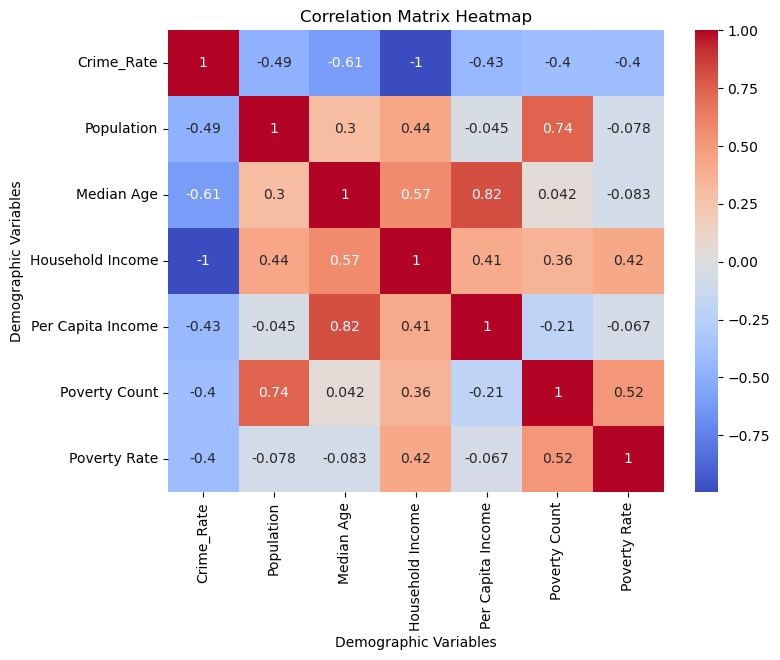

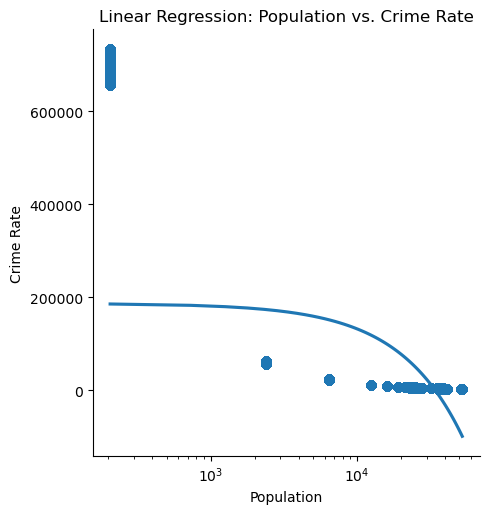

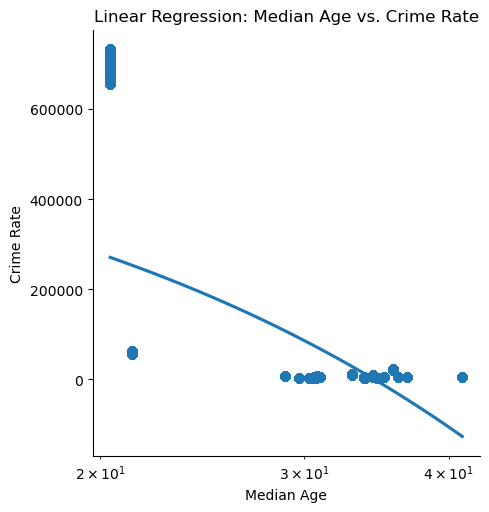

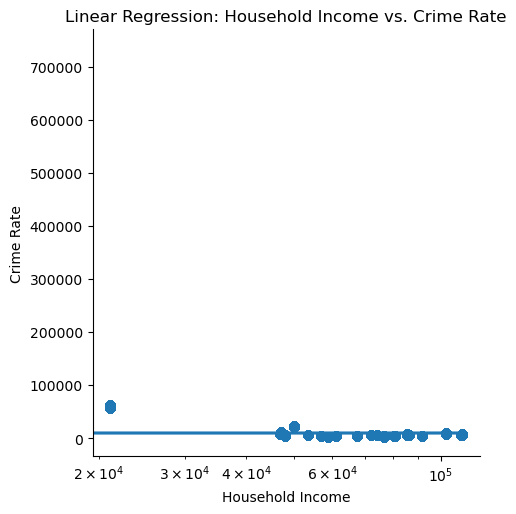

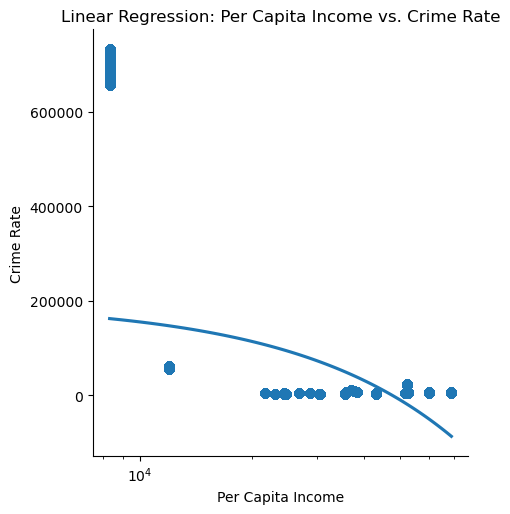

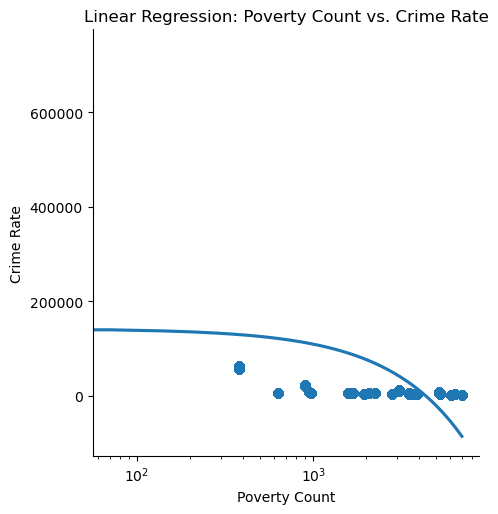

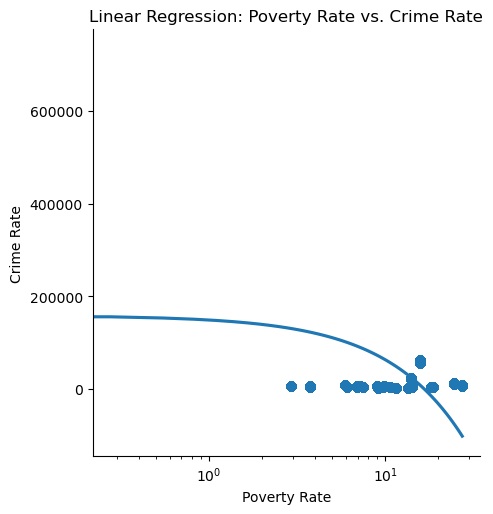

In [6]:
# Define function to plot correlation matrix heatmap
def plot_corr_heatmap(data, filename):
    corr_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.xlabel('Demographic Variables')
    plt.ylabel('Demographic Variables')
    plt.savefig(filename)
    plt.show()

# Define function to plot linear regression scatter plot
def plot_regression_scatter(x, y, x_label, y_label, title, filename):
    sns.lmplot(x=x, y=y, data=merged_data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log') # Add this line to apply log scale to x-axis
    plt.savefig(filename)
    plt.show()

# Select relevant columns for correlation analysis
corr_data = merged_data[['Crime_Rate', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]

# Plot correlation matrix heatmap and save plot
plot_corr_heatmap(corr_data, 'correlation_matrix_heatmap.png')

# Plot linear regression models and save plots
plot_regression_scatter('Population', 'Crime_Rate', 'Population', 'Crime Rate', 'Linear Regression: Population vs. Crime Rate', 'population_vs_crime_rate.png')
plot_regression_scatter('Median Age', 'Crime_Rate', 'Median Age', 'Crime Rate', 'Linear Regression: Median Age vs. Crime Rate', 'median_age_vs_crime_rate.png')
plot_regression_scatter('Household Income', 'Crime_Rate', 'Household Income', 'Crime Rate', 'Linear Regression: Household Income vs. Crime Rate', 'household_income_vs_crime_rate.png')
plot_regression_scatter('Per Capita Income', 'Crime_Rate', 'Per Capita Income', 'Crime Rate', 'Linear Regression: Per Capita Income vs. Crime Rate', 'per_capita_income_vs_crime_rate.png')
plot_regression_scatter('Poverty Count', 'Crime_Rate', 'Poverty Count', 'Crime Rate', 'Linear Regression: Poverty Count vs. Crime Rate', 'poverty_count_vs_crime_rate.png')
plot_regression_scatter('Poverty Rate', 'Crime_Rate', 'Poverty Rate', 'Crime Rate', 'Linear Regression: Poverty Rate vs. Crime Rate', 'poverty_rate_vs_crime_rate.png')

In [7]:
#Print and save regression model summary
X = merged_data[['Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]
y = merged_data['Crime_Rate']

X = sm.add_constant(X) # add constant term to X matrix
model = sm.OLS(y, X).fit() # fit OLS model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime_Rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.784e+07
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:13:39   Log-Likelihood:            -5.0351e+06
No. Observations:              488247   AIC:                         1.007e+07
Df Residuals:                  488240   BIC:                         1.007e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.976e+04    157.22